# Traffic Signs Classification

## Import Libraries

In [2]:
import pandas as pd
import tensorflow as tf
import keras
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications import InceptionV3
from keras.utils import to_categorical
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D, Input
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Loading Data

In [4]:
data = pd.read_pickle(r"C:\Users\nurbo\Desktop\coding\python\AML\traffic-signs-preprocessed\data8.pickle")

## Data Processing

In [6]:
data.keys()

dict_keys(['y_validation', 'x_train', 'y_train', 'x_validation', 'labels', 'x_test', 'y_test'])

In [7]:
print("x train shape:", data["x_train"].shape)
print("y train shape:", data["y_train"].shape)
print("x test shape:", data["x_test"].shape)
print("y test shape:", data["y_test"].shape)
print("x validation shape:", data["x_validation"].shape)
print("y validation shape:", data["y_validation"].shape)

x train shape: (86989, 1, 32, 32)
y train shape: (86989,)
x test shape: (12630, 1, 32, 32)
y test shape: (12630,)
x validation shape: (4410, 1, 32, 32)
y validation shape: (4410,)


In [8]:
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_validation"]
y_train = data["y_train"]
y_val = data["y_validation"]

In [9]:
x_train = x_train.swapaxes(1,2)
x_train.shape

(86989, 32, 1, 32)

In [10]:
x_train = x_train.swapaxes(2,3)
x_train.shape

(86989, 32, 32, 1)

In [11]:
x_val = x_val.swapaxes(1,2)
x_val = x_val.swapaxes(2,3)
print("x val shape:", x_val.shape)

x val shape: (4410, 32, 32, 1)


## Visualization

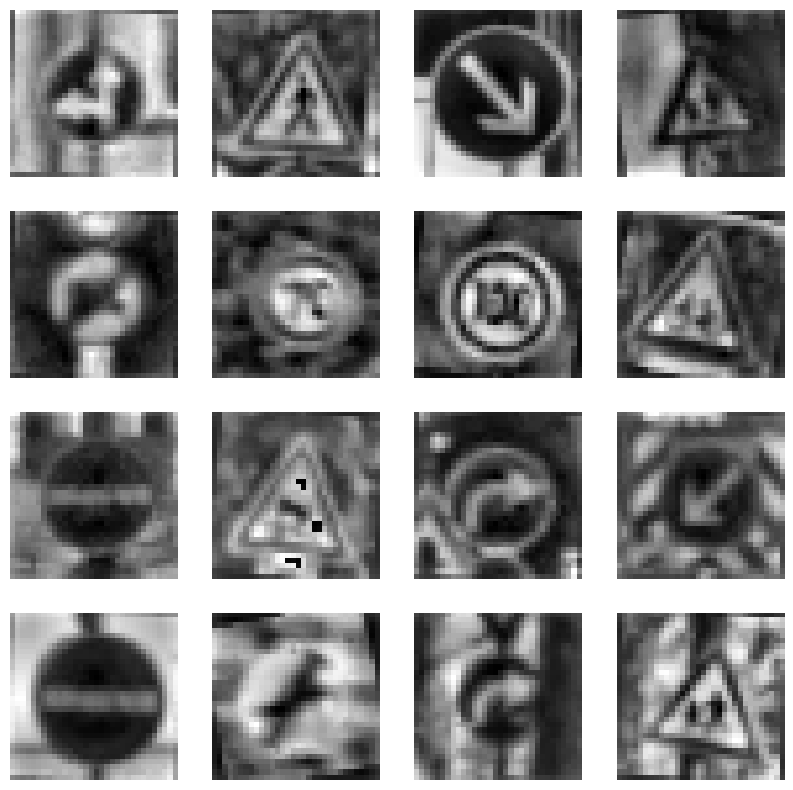

In [13]:
plt.figure(figsize=(10,10)) 

for i in range(16):
    plt.subplot(4,4,i+1)   
    plt.imshow(x_train[i], cmap = "gray")
    plt.axis("off")

plt.show()

## Reshaping

In [16]:
def resize(img):
    numberofImage = img.shape[0]
    new_array = np.zeros((numberofImage,64,64,1))
    for i in range(numberofImage):
        new_array[i] = tf.image.resize(img[i],(64,64))
    return new_array

In [17]:
x_train_resized = resize(x_train)
x_val_resized = resize(x_val)
print("x train resized shape:", x_train_resized.shape)
print("x validation resized shape:", x_val_resized.shape)

x train resized shape: (86989, 64, 64, 1)
x validation resized shape: (4410, 64, 64, 1)


In [18]:
NumberofClass = 43
y_train = to_categorical(y_train, num_classes = NumberofClass)
y_val = to_categorical(y_val, num_classes = NumberofClass)

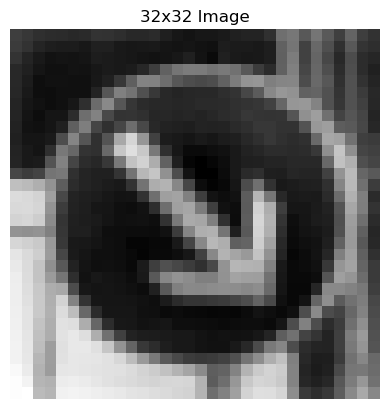

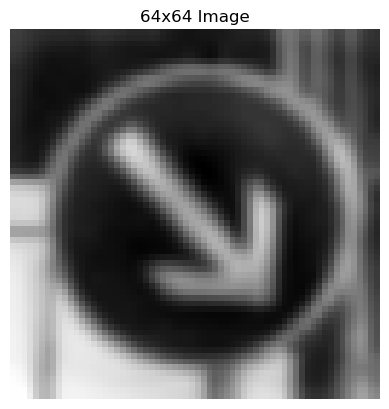

In [19]:
plt.imshow(x_train[2], cmap = "gray")
plt.title("32x32 Image")
plt.axis("off")
plt.show()

plt.figure()

plt.imshow(x_train_resized[2], cmap = "gray")
plt.title("64x64 Image")
plt.axis("off")
plt.show()


## CNN Model

In [21]:
model = Sequential()

model.add(Input(shape=(64, 64, 1)))

model.add(Conv2D(filters=64, kernel_size=(4, 4), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4, 4), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(4, 4), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=8, kernel_size=(4, 4), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=256, activation="relu"))  
model.add(Dropout(0.5))
model.add(Dense(units=NumberofClass, activation="softmax"))


## Compiling the Model

In [23]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

## Fitting 

In [38]:
hist = model.fit(x_train_resized, y_train, batch_size = 512,
                    epochs = 5, validation_data = (x_val_resized, y_val))

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 508s 3s/step - accuracy: 0.7671 - loss: 0.7646 - val_accuracy: 0.8542 - val_loss: 0.4782
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 472s 3s/step - accuracy: 0.8582 - loss: 0.4691 - val_accuracy: 0.9166 - val_loss: 0.3158
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 0.9001 - loss: 0.3252 - val_accuracy: 0.9304 - val_loss: 0.2885
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 489s 3s/step - accuracy: 0.9306 - loss: 0.2333 - val_accuracy: 0.9435 - val_loss: 0.2325
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - accuracy: 0.9446 - loss: 0.1858 - val_accuracy: 0.9392 - val_loss: 0.2349


## Evaluating

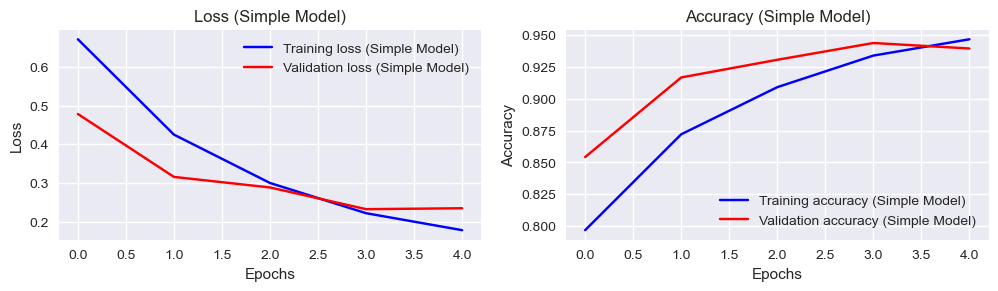

In [124]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

#Loss graph for simple model
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(hist.history['loss'], color='b', label="Training loss (Simple Model)")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss (Simple Model)")
plt.title('Loss (Simple Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy graph for simple model
plt.subplot(2, 2, 2)
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy (Simple Model)")
plt.plot(hist.history['val_accuracy'], color='r', label="Validation accuracy (Simple Model)")
plt.title('Accuracy (Simple Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# ## Enhanced Model

In [79]:
enhanced_model = Sequential()

enhanced_model.add(Input(shape=(64, 64, 1)))

enhanced_model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu"))
enhanced_model.add(BatchNormalization())
enhanced_model.add(MaxPool2D(pool_size=(2, 2)))

enhanced_model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="Same", activation="relu"))
enhanced_model.add(BatchNormalization())
enhanced_model.add(MaxPool2D(pool_size=(2, 2)))

enhanced_model.add(Conv2D(filters=8, kernel_size=(3, 3), padding="Same", activation="relu"))
enhanced_model.add(BatchNormalization())
enhanced_model.add(MaxPool2D(pool_size=(2, 2)))

enhanced_model.add(Flatten())

enhanced_model.add(Dense(units=256, activation="relu"))
enhanced_model.add(Dropout(0.5))
enhanced_model.add(Dense(units=NumberofClass, activation="softmax"))

In [81]:
enhanced_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Training the Enhanced Model

In [84]:
enhanced_hist = enhanced_model.fit(x_train_resized, y_train, batch_size=512,
                                   epochs=5, validation_data=(x_val_resized, y_val))

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.3465 - loss: 2.6348 - val_accuracy: 0.2549 - val_loss: 2.7832
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.8840 - loss: 0.3952 - val_accuracy: 0.7254 - val_loss: 0.8628
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.9391 - loss: 0.2058 - val_accuracy: 0.9018 - val_loss: 0.2930
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.9588 - loss: 0.1395 - val_accuracy: 0.9395 - val_loss: 0.1896
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.9708 - loss: 0.0990 - val_accuracy: 0.9510 - val_loss: 0.1529


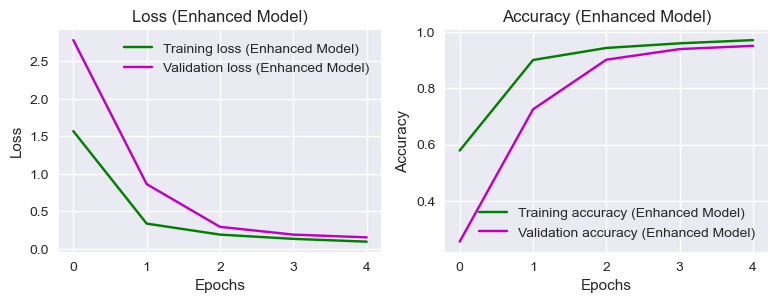

In [126]:
# Loss graph for the improved model
plt.subplot(2, 2, 3)
plt.plot(enhanced_hist.history['loss'], color='g', label="Training loss (Enhanced Model)")
plt.plot(enhanced_hist.history['val_loss'], color='m', label="Validation loss (Enhanced Model)")
plt.title('Loss (Enhanced Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot for improved model
plt.subplot(2, 2, 4)
plt.plot(enhanced_hist.history['accuracy'], color='g', label="Training accuracy (Enhanced Model)")
plt.plot(enhanced_hist.history['val_accuracy'], color='m', label="Validation accuracy (Enhanced Model)")
plt.title('Accuracy (Enhanced Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

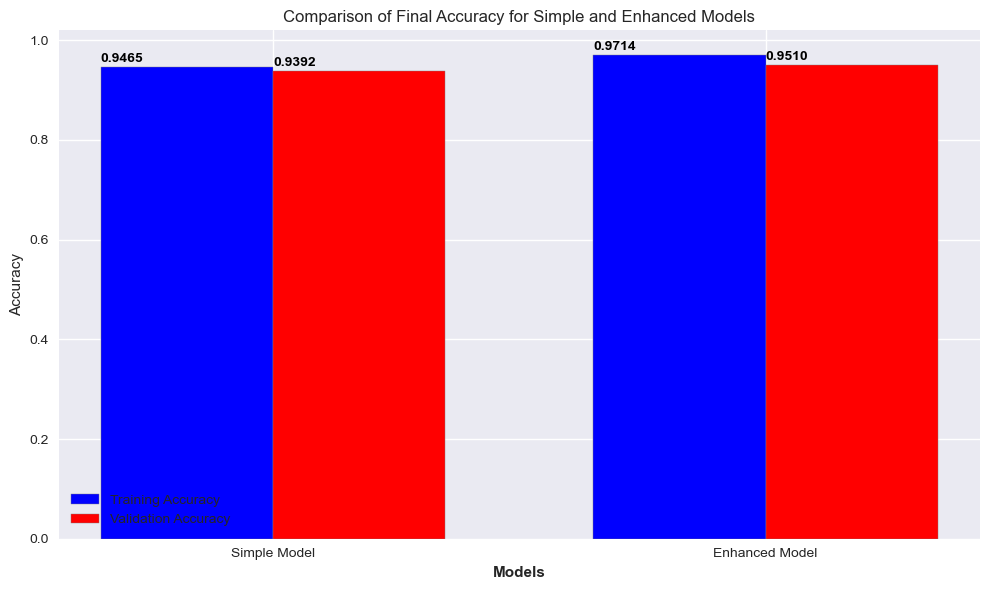

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# We obtain the final accuracy values for both models
simple_model_train_acc = hist.history['accuracy'][-1]
simple_model_val_acc = hist.history['val_accuracy'][-1]

enhanced_model_train_acc = enhanced_hist.history['accuracy'][-1]
enhanced_model_val_acc = enhanced_hist.history['val_accuracy'][-1]

# Data for the bar chart
models = ['Simple Model', 'Enhanced Model']
train_accuracies = [simple_model_train_acc, enhanced_model_train_acc]
val_accuracies = [simple_model_val_acc, enhanced_model_val_acc]

bar_width = 0.35

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Create a column chart
plt.figure(figsize=(10, 6))
plt.bar(r1, train_accuracies, color='b', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, val_accuracies, color='r', width=bar_width, edgecolor='grey', label='Validation Accuracy')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy')
plt.title('Comparison of Final Accuracy for Simple and Enhanced Models')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()

for i, v in enumerate(train_accuracies):
    plt.text(i - bar_width/2, v + 0.01, f"{v:.4f}", color='black', fontweight='bold')
for i, v in enumerate(val_accuracies):
    plt.text(i + bar_width/2, v + 0.01, f"{v:.4f}", color='black', fontweight='bold')

plt.tight_layout()
plt.show()

## Metrics and Validation

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [89]:
x_test_resized = resize(x_test)
y_pred = enhanced_model.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = data["y_test"]

print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("Precision:", precision_score(y_test_classes, y_pred_classes, average="weighted"))
print("Recall:", recall_score(y_test_classes, y_pred_classes, average="weighted"))
print("F1 Score:", f1_score(y_test_classes, y_pred_classes, average="weighted"))



395/395 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step
Accuracy: 0.939667458432304
Precision: 0.9411692559148244
Recall: 0.939667458432304
F1 Score: 0.939406562618009


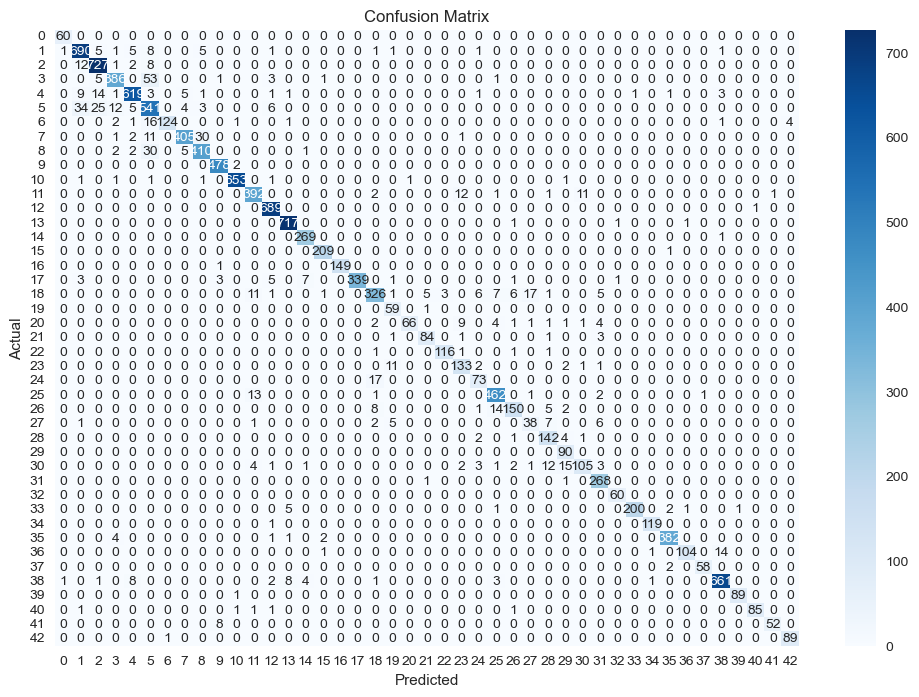

In [91]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(NumberofClass), yticklabels=range(NumberofClass))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

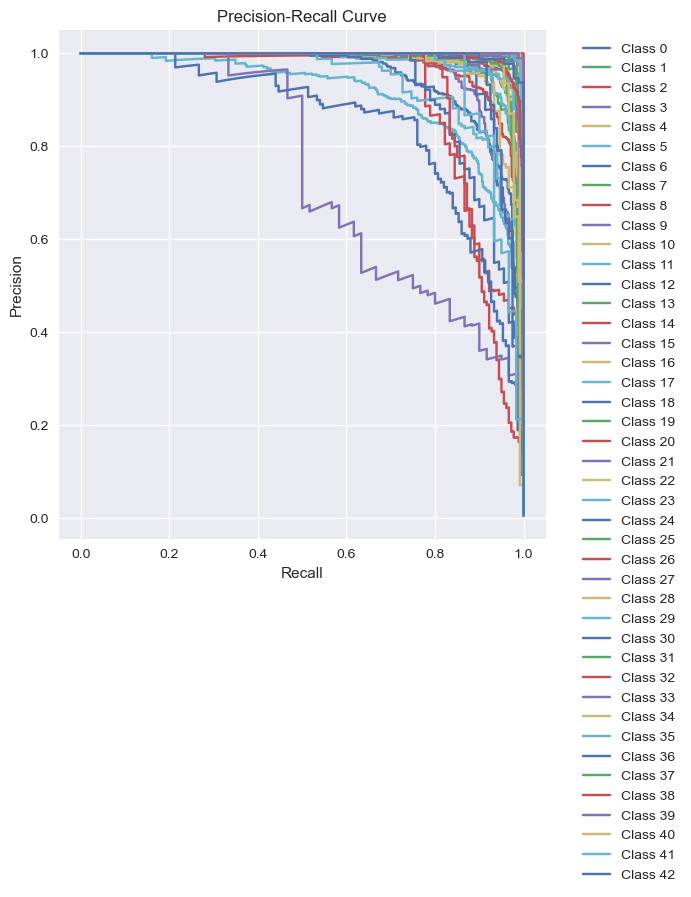

In [97]:
from sklearn.metrics import auc, precision_recall_curve

# Precision-Recall для нескольких классов
plt.figure(figsize=(12, 8))

for i in range(NumberofClass):
    fpr, tpr, _ = roc_curve(to_categorical(data["y_test"], NumberofClass)[:, i], y_pred[:, i])
    precision, recall, _ = precision_recall_curve(to_categorical(data["y_test"], NumberofClass)[:, i], y_pred[:, i])

    # Precision-Recall
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'Class {i}')
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()